In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
data = pd.read_csv("cardio_train.csv", sep = ';')

In [56]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [57]:
data.shape

(69301, 13)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
id             69301 non-null int64
age            69301 non-null int64
gender         69301 non-null int64
height         69301 non-null int64
weight         69301 non-null float64
ap_hi          69301 non-null int64
ap_lo          69301 non-null int64
cholesterol    69301 non-null int64
gluc           69301 non-null int64
smoke          69301 non-null int64
alco           69301 non-null int64
active         69301 non-null int64
cardio         69301 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [59]:
data.isnull().sum().sum()

0

In [60]:
data.duplicated().sum()

0

In [61]:
data['cardio'].value_counts()

0    34679
1    34622
Name: cardio, dtype: int64

In [62]:
data['alco'].value_counts()

0    65567
1     3734
Name: alco, dtype: int64

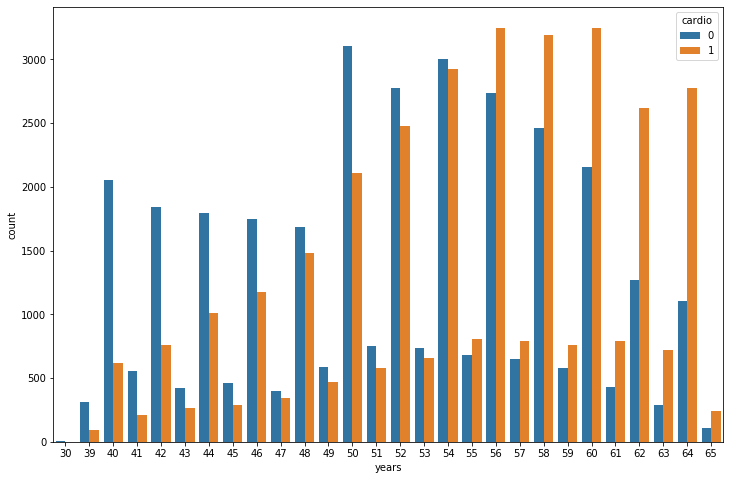

In [63]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,8
data['years'] = (data['age'] / 365).round().astype('int')
sns.countplot(x = 'years', hue = 'cardio', data = data)

**It can be observed that people over 55 of age are more exposed to CVD.** 

In [64]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0,62
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1,40
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0,60
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0,40
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0,64


In [65]:
data['gender'].value_counts()

1    45079
2    24222
Name: gender, dtype: int64

In [66]:
data.groupby('gender')['alco'].sum()

gender
1    1153
2    2581
Name: alco, dtype: int64

In [67]:
data.groupby('gender')['cardio'].sum()

gender
1    22379
2    12243
Name: cardio, dtype: int64

In [68]:
data = data.drop(['id', 'age'], axis = 1)

In [69]:
data.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
0,1,155,69.0,130,80,2,2,0,0,1,0,62
1,1,163,71.0,110,70,1,1,0,0,1,1,40
2,1,165,70.0,120,80,1,1,0,0,1,0,60
3,2,165,85.0,120,80,1,1,1,1,1,0,40
4,1,155,62.0,120,80,1,1,0,0,1,0,64


In [70]:
data.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589,53.338177
std,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003,6.765427
min,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


**Columns of "height", "weight", "ap_hi", "ap_lo" may have outlier.**

In [71]:
out_filter = ((data['ap_hi']>250) | (data['ap_lo']>200))

In [72]:
data = data[~out_filter]
len(data)

68318

In [73]:
out_filter = ((data['ap_hi']<0) | (data['ap_lo']<0))

In [74]:
data = data[~out_filter]
len(data)

68310

In [77]:
out_filter = ((data['height']>200) | (data['weight']>130))

In [78]:
data = data[~out_filter]
len(data)

66501

In [79]:
out_filter = ((data['height']<100) | (data['weight']<30))

In [80]:
data = data[~out_filter]
len(data)

66471

In [81]:
data['bmi'] = data['weight'] / (data['height']/100) **2

In [82]:
data.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi
0,1,155,69.0,130,80,2,2,0,0,1,0,62,28.720083
1,1,163,71.0,110,70,1,1,0,0,1,1,40,26.722873
2,1,165,70.0,120,80,1,1,0,0,1,0,60,25.711662
3,2,165,85.0,120,80,1,1,1,1,1,0,40,31.221304
4,1,155,62.0,120,80,1,1,0,0,1,0,64,25.806452


In [83]:
data.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi
count,66471.000000,66471.000000,66471.000000,66471.000000,66471.000000,66471.000000,66471.000000,66471.000000,66471.000000,66471.000000,66471.000000,66471.000000,66471.000000
mean,1.337079,163.966978,73.424230,126.195619,81.255615,1.362354,1.224338,0.084669,0.052158,0.803945,0.493238,53.355478,27.361299
std,0.472716,7.481329,13.265358,17.615394,9.831802,0.677302,0.570324,0.278390,0.222347,0.397014,0.499958,6.763635,5.025558
min,1.000000,100.000000,30.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,10.726644
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,1.000000,164.000000,71.300000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,26.298488
75%,2.000000,169.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.110279
max,2.000000,180.000000,120.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,86.776860


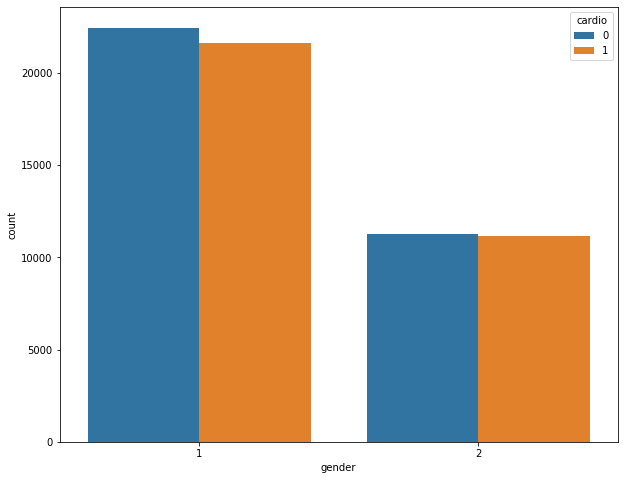

In [84]:
rcParams['figure.figsize'] = 10,8
sns.countplot(x = 'gender', hue = 'cardio', data = data)

In [85]:
from sklearn.model_selection import train_test_split

y = data['cardio']
X = data.drop(['cardio'], axis = 1)

In [86]:
X.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,years,bmi
0,1,155,69.0,130,80,2,2,0,0,1,62,28.720083
1,1,163,71.0,110,70,1,1,0,0,1,40,26.722873
2,1,165,70.0,120,80,1,1,0,0,1,60,25.711662
3,2,165,85.0,120,80,1,1,1,1,1,40,31.221304
4,1,155,62.0,120,80,1,1,0,0,1,64,25.806452


In [87]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,                                
                                                    test_size = 0.25, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 49853 samples.
Testing set has 16618 samples.


### Decision Tree Classifier

In [88]:
# Import DecissionTree classification model from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

DT_predictor = DecisionTreeClassifier(max_depth=3, min_samples_split=50, min_samples_leaf=50, random_state=13)
DT_predictor.fit(X_train, y_train)
y_predicted = DT_predictor.predict(X_test)
y_predicted

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [89]:
# Evaluate the model
print("------------------------------------------------------") 
print("Confussion Matrix")
print("------------------------------------------------------")
print(confusion_matrix(y_test,y_predicted))
print("------------------------------------------------------")
print("Classification Report")
print("------------------------------------------------------")
print(classification_report(y_test,y_predicted))
print("------------------------------------------------------")
DT_accuracy = round(accuracy_score(y_test, y_predicted), 2)
print("Overall accuracy score: " + str(DT_accuracy))
print("------------------------------------------------------")

------------------------------------------------------
Confussion Matrix
------------------------------------------------------
[[6597 1735]
 [2783 5503]]
------------------------------------------------------
Classification Report
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      8332
           1       0.76      0.66      0.71      8286

    accuracy                           0.73     16618
   macro avg       0.73      0.73      0.73     16618
weighted avg       0.73      0.73      0.73     16618

------------------------------------------------------
Overall accuracy score: 0.73
------------------------------------------------------
